In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the Dataset
df = pd.read_csv(r"C:\Users\GURU\Downloads\PCA\PCA\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.columns = df.columns.str.strip()     # Clean any extra spaces

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# Exploratory Data Analysis (EDA)
#Distribution Plots

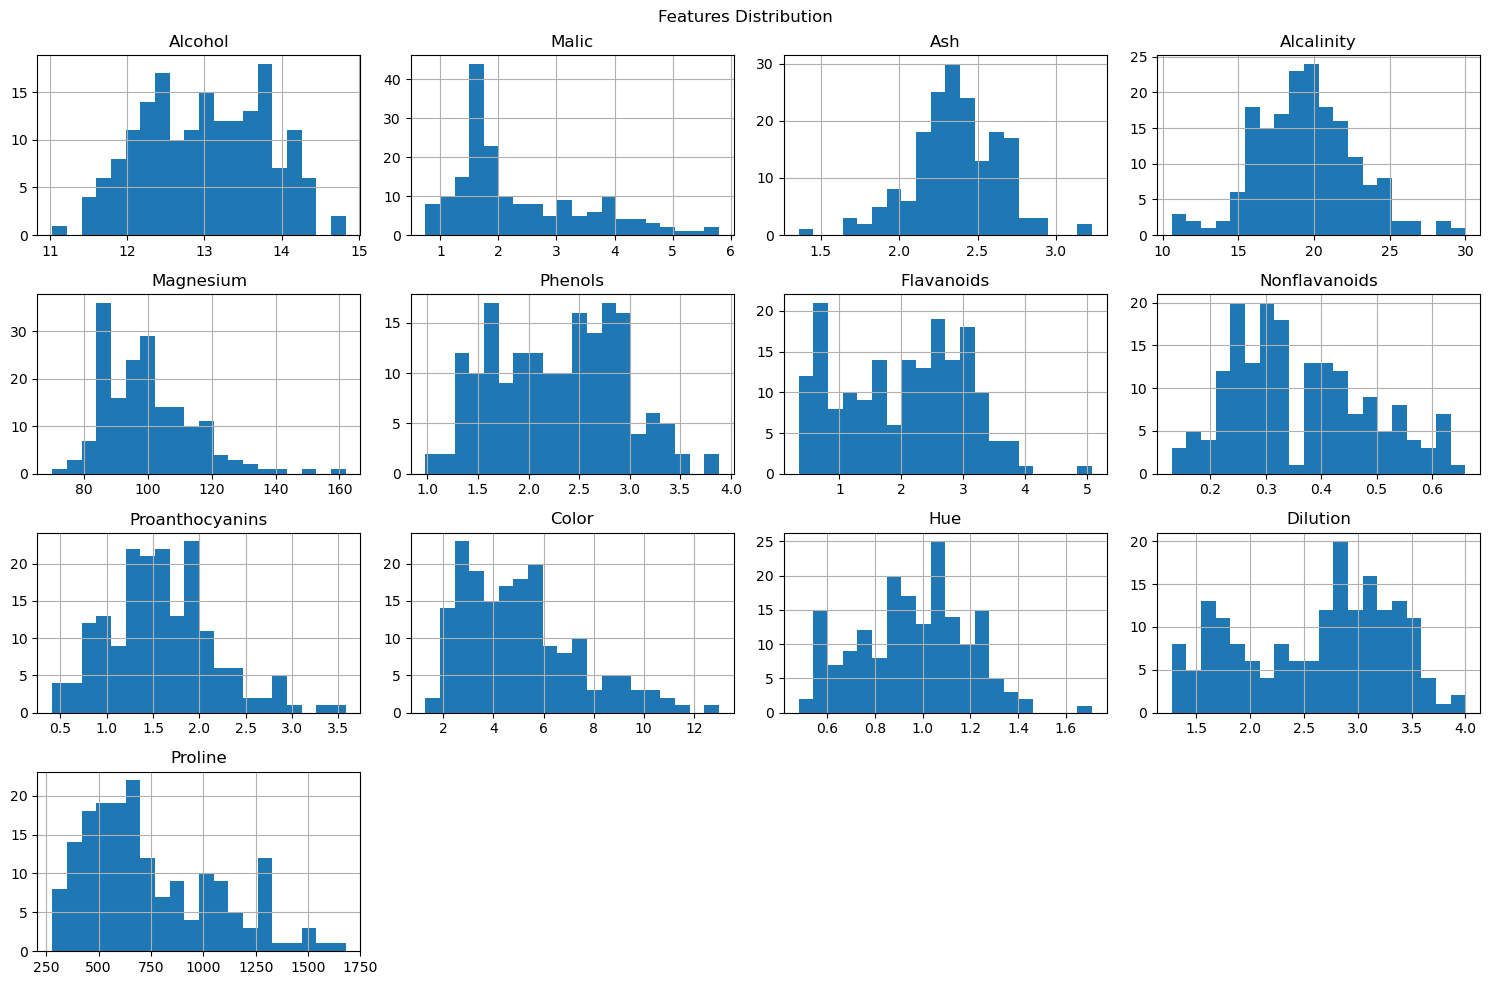

In [8]:
df.iloc[:,1:].hist(figsize = (15, 10), bins = 20)
plt.suptitle("Features Distribution")
plt.tight_layout()
plt.show()

In [9]:
#Box Plots

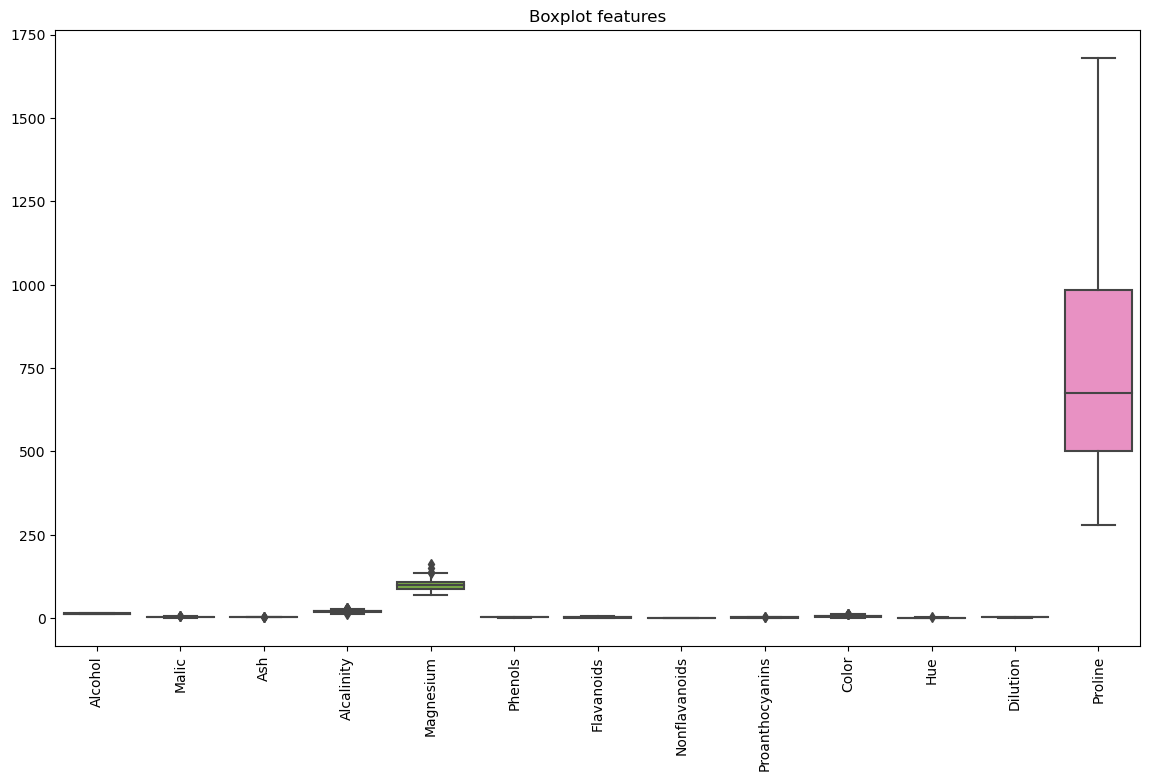

In [10]:
plt.figure(figsize = (14, 8))
sns.boxplot(data = df.iloc[:,1:])
plt.xticks(rotation = 90)
plt.title("Boxplot features")
plt.show()

In [11]:
#Correlation Heatmap

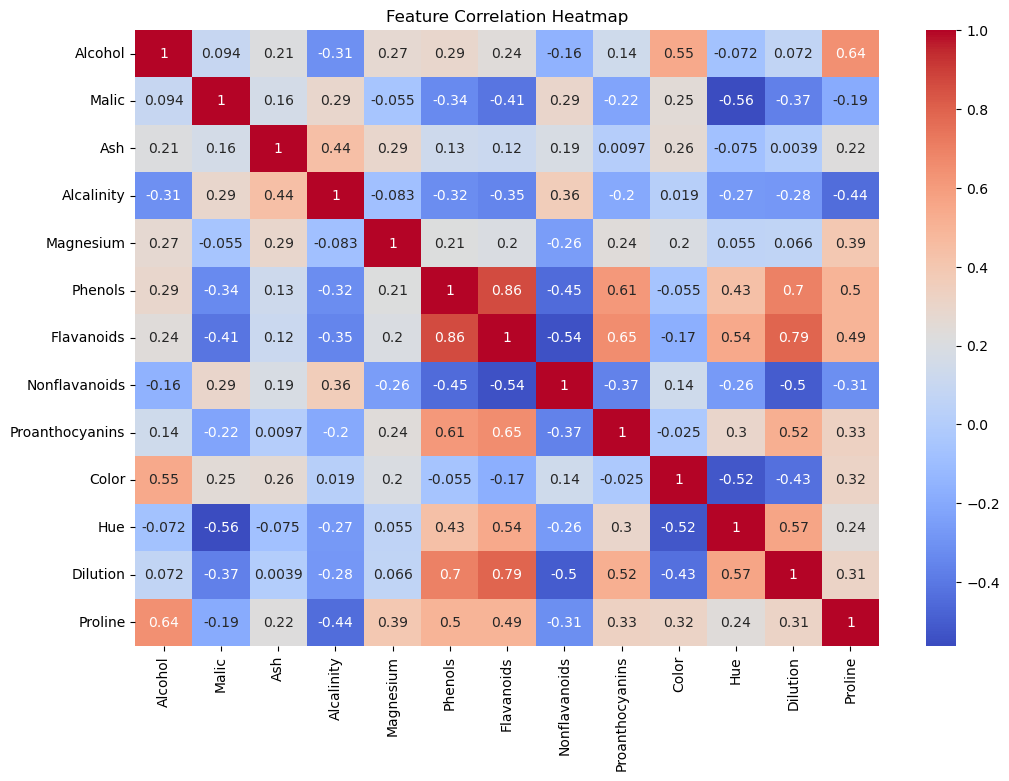

In [12]:
plt.figure(figsize = ( 12, 8))
sns.heatmap(df.iloc[:, 1:].corr(), annot = True, cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Standardization

In [14]:
features = df.columns[1:]
X = df[features]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# PCA: Dimensionality Reduction

In [17]:
#Scree Plot

In [18]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

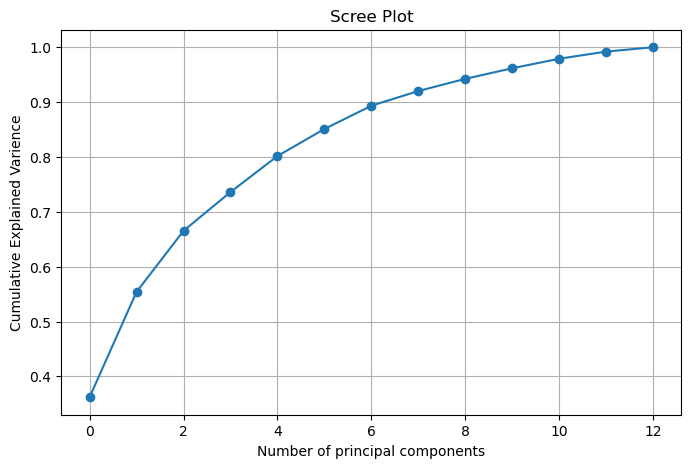

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker = 'o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative Explained Varience")
plt.title("Scree Plot")
plt.grid()
plt.show()

In [20]:
#Apply PCA with 2 Components

In [21]:
pca = PCA(n_components = 2)
X_pca_2 = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca_2,columns = ['PC1', 'PC2'])

In [22]:
#Clustering on Original Data
#KMeans on Original Data

In [23]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
# Evaluation
print("Original Data - Silhouette Score :", silhouette_score(X_scaled , clusters_orig))
print("Original Data - Davies Bouldin Score :", davies_bouldin_score(X_scaled, clusters_orig))

Original Data - Silhouette Score : 0.2848589191898987
Original Data - Davies Bouldin Score : 1.3891879777181648


In [25]:
#Visualization

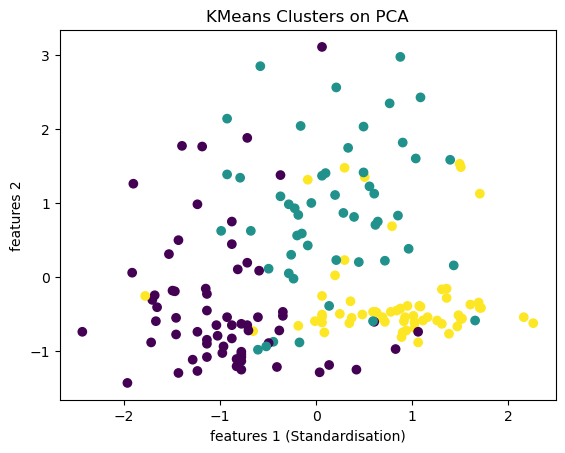

In [26]:
plt.scatter(X_scaled[:, 0], X_scaled[:,1], c = clusters_orig, cmap = 'viridis')
plt.title("KMeans Clusters on PCA")
plt.xlabel("features 1 (Standardisation)")
plt.ylabel("features 2")
plt.show()

In [27]:
#Clustering on PCA Data
#KMeans on PCA Data

In [28]:
kmeans_pca = KMeans(n_clusters = 3 , random_state = 42)
clusters_pca = kmeans_pca.fit_predict(pca_df)

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
# Evaluation
print("PCA Data - Silhouette Score :", silhouette_score(pca_df, clusters_pca))
print("PCA Data - Davies Bouldin Score :", davies_bouldin_score(pca_df, clusters_pca))

PCA Data - Silhouette Score : 0.5601697480957203
PCA Data - Davies Bouldin Score : 0.5977226208167409


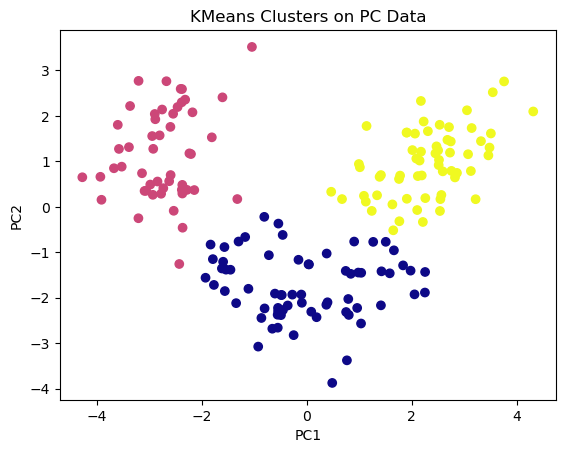

In [30]:
#Visualization
plt.scatter(pca_df['PC1'] , pca_df['PC2'], c= clusters_pca, cmap= 'plasma')
plt.title("KMeans Clusters on PC Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [31]:
# Final Comparison

In [32]:
print("Original Data vs PCA Clustering Comparision")
print(" Silhouette Score - Original :", silhouette_score(X_scaled, clusters_orig))
print("Silhouette Score - PCA  :", silhouette_score(pca_df, clusters_pca))

Original Data vs PCA Clustering Comparision
 Silhouette Score - Original : 0.2848589191898987
Silhouette Score - PCA  : 0.5601697480957203


In [33]:
print("Davies Bouldin Score :", davies_bouldin_score(X_scaled,clusters_orig))
print("Davies Bouldin Score :", davies_bouldin_score(pca_df, clusters_pca))

Davies Bouldin Score : 1.3891879777181648
Davies Bouldin Score : 0.5977226208167409


In [34]:
#Task 6: Conclusion and Insights
#  1. Summary of Key Findings:

#PCA reduced the dimensions while keeping most of the important information.
#Clustering results were clearer and more effective after applying PCA.

# 2. Practical Implications:

#PCA helps in simplifying large datasets and improving visualization.
#Clustering helps to find hidden patterns and group similar data points.

# 3. Recommendations:

#Use PCA before clustering when dealing with high-dimensional data.
#Use clustering to segment data and find patterns when labels are not available.
